## Test `asc_desc2horz_vert.py`

In [1]:
%matplotlib inline
import os
import numpy as np
from matplotlib import pyplot as plt
from mintpy.utils import utils as ut
plt.rcParams.update({'font.size': 12})

### Simulate ENU displacement

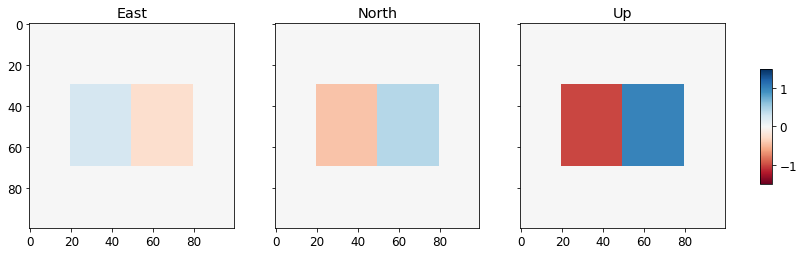

In [2]:
simV, simH = 1, 0.5
azimuth = 30  # [0 for north, -90 for east] defined as azimuth angle in degrees measured from the north with anti-clockwise as positive
# ENU setup
length, width = 100, 100
dE = np.zeros((length, width), dtype=np.float32)
dN = np.zeros((length, width), dtype=np.float32)
dU = np.zeros((length, width), dtype=np.float32)
dE[30:70,20:50] = -simH * np.sin(azimuth * np.pi/180) * -1;  dE[30:70,50:80] = simH * np.sin(azimuth * np.pi/180) * -1
dN[30:70,20:50] = -simH * np.cos(azimuth * np.pi/180);       dN[30:70,50:80] = simH * np.cos(azimuth * np.pi/180)
dU[30:70,20:50] = -simV;                                     dU[30:70,50:80] = simV

# plot - ENU
kwargs = dict(vmin=-1.5, vmax=1.5, cmap='RdBu', interpolation='nearest');  cbar_len = 0.4
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=[12, 4], sharey=True)
for ax, data, title in zip(axs, [dE, dN, dU], ['East', 'North', 'Up']):
    im = ax.imshow(data, **kwargs);  ax.set_title(title)
fig.subplots_adjust(right=0.93); cax = fig.add_axes([0.97, (1.0-cbar_len)/2, 0.015, cbar_len]);  fig.colorbar(im, cax=cax)
plt.show()

### ENU -> asc/desc LOS

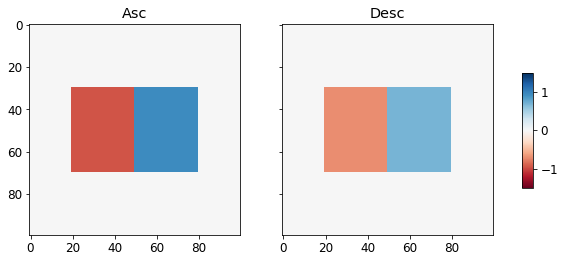

In [3]:
# ENU to LOS
inc_angle = 30
az_angle_asc = 102
az_angle_desc = -102
dAsc  = ut.enu2los(dE, dN, dU, inc_angle=inc_angle, az_angle=az_angle_asc)
dDesc = ut.enu2los(dE, dN, dU, inc_angle=inc_angle, az_angle=az_angle_desc)

# plot - asc/desc LOS
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=[8, 4], sharey=True)
for ax, data, title in zip(axs, [dAsc, dDesc], ['Asc', 'Desc']):
    im = ax.imshow(data, **kwargs);  ax.set_title(title)
fig.subplots_adjust(right=0.93);  cax = fig.add_axes([0.98, (1.0-cbar_len)/2, 0.02, cbar_len]);  fig.colorbar(im, cax=cax)
plt.show()

### asc/desc LOS -> horz/vert

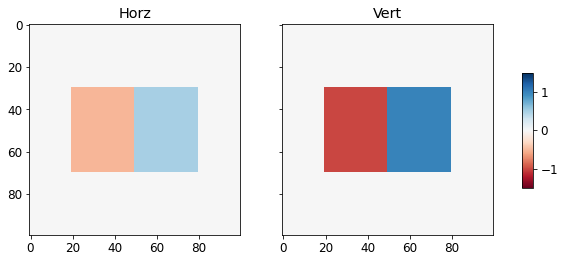

In [4]:
# construct design matrix
A = np.zeros((2,2), dtype=np.float32)
A[0, 0] = np.cos(inc_angle*np.pi/180);  A[0, 1] = np.sin(inc_angle*np.pi/180) * np.cos(az_angle_asc*np.pi/180  - azimuth*np.pi/180)
A[1, 0] = np.cos(inc_angle*np.pi/180);  A[1, 1] = np.sin(inc_angle*np.pi/180) * np.cos(az_angle_desc*np.pi/180 - azimuth*np.pi/180)

# asc / desc -> horz / vert
dLOS = np.vstack((dAsc.flatten(), dDesc.flatten()))
dVH = np.dot(np.linalg.pinv(A), dLOS).astype(np.float32)
dV = np.reshape(dVH[0, :], (length, width))
dH = np.reshape(dVH[1, :], (length, width))

# plot
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=[8, 4], sharey=True)
for ax, data, title in zip(axs, [dH, dV], ['Horz'.format(azimuth), 'Vert']):
    im = ax.imshow(data, **kwargs);  ax.set_title(title)
fig.subplots_adjust(right=0.93);  cax = fig.add_axes([0.98, (1.0-cbar_len)/2, 0.02, cbar_len]);  fig.colorbar(im, cax=cax)
plt.show()

### Summary

In [5]:
print('Simulation: horizontal = {:.2f}, vertical = {:.2f}'.format(simH, simV))
print('Estimation: horizontal = {:.2f}, vertical = {:.2f}'.format(np.max(np.abs(dH)), np.max(np.abs(dV))))

Simulation: horizontal = 0.50, vertical = 1.00
Estimation: horizontal = 0.50, vertical = 1.00
